In [133]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import time
#借鉴网上大佬的代码
#具体参考 https://blog.csdn.net/qq_23926575/article/details/80139071
def quantilize(h, s, v):#将HSV转换为量化级数
    hlist = [20, 40, 75, 155, 190, 270, 290, 316, 360]
    svlist = [21, 178, 255]
    '''hsv直方图量化'''
    # value : [21, 144, 23] h, s, v
    h = h * 2
    for i in range(len(hlist)):
        if h <= hlist[i]:
            h = i % 8
            break
    for i in range(len(svlist)):
        if s <= svlist[i]:
            s = i
            break
    for i in range(len(svlist)):
        if v <= svlist[i]:
            v = i
            break
    return 9 * h + 3 * s + v

quantilize_ufunc = np.frompyfunc(quantilize, 3, 1) # 自定义ufunc函数，即将quantilize函数转化为ufunc函数，其输入参数为３个，输出参数为１个。

def colors(img):#将图片转化为一个72维向量
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    nhsv = quantilize_ufunc(hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]).astype(np.uint8) # 由于frompyfunc函数返回结果为对象，所以需要转换类型
    hist = cv2.calcHist([nhsv], [0], None, [72], [0,71]) # 40x faster than np.histogram
    hist /= np.sum(hist)
    return hist.reshape(1,-1),nhsv


In [ ]:
#构造向量表
files = os.listdir('jpeg')
img_features = np.zeros((len(files),72))
begin = time.time()
for i in range(len(files)):
    path = files[i]
    img_path = os.path.join('jpeg',path)
    img = cv2.imread(img_path)
    feature,nhsv = colors(img)
    img_features[i,:] = feature

In [69]:
img_features = np.loadtxt('param')

In [143]:
def find_img(path):#检索相似图片
    params = dict(histtype='stepfilled',bins=72)
    files = os.listdir('jpeg')
    img =  cv2.imread(path)
    begin = time.time()
    fs,nhsv = colors(img)
    print(fs.shape)
    f = np.ones(img_features.shape) * fs
    index = f > img_features
    f[index] = img_features[index]
    result = np.sum(f,1)
    res = np.argsort(result)
    use_time = time.time() -  begin
    plt.figure(12)
    print('use time :{}'.format(use_time))
    plt.subplot(241)
    x1 = imgplt.imread(path)
    plt.imshow(x1)
    plt.subplot(245)
    plt.hist(nhsv,**params)
    k = -1
    for j in range(2,5):
        plt.subplot(240+j)
        x1= cv2.imread(os.path.join('jpeg',files[res[k]]))
        img = cv2.cvtColor(x1, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.subplot(240+j+4)
        _,nhsv = colors(x1)
        plt.hist(nhsv,**params)
        k -= 1  

(1, 72)
use time :0.1586143970489502


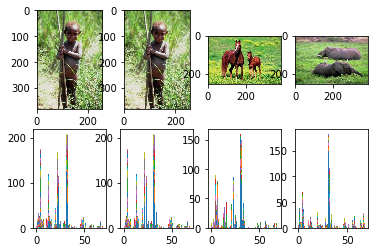

In [146]:
path = 'jpeg/34.jpg'
find_img(path)

In [ ]:
第一张是我要检索的图片，后面是检索结果，但最后一张基本除了颜色差不多内容就差很多了，
所以我可不可以理解为这个方法对图片具体内容检索效果不好？只是颜色上相似就会被找到？其他一些例如轮廓特征基本就找不到了？

(array([ 16.,  46., 132., 231., 248., 173., 113.,  34.,   6.,   1.]),
 array([-2.9284996 , -2.26506278, -1.60162596, -0.93818913, -0.27475231,
         0.38868452,  1.05212134,  1.71555817,  2.37899499,  3.04243181,
         3.70586864]),
 <a list of 10 Patch objects>)

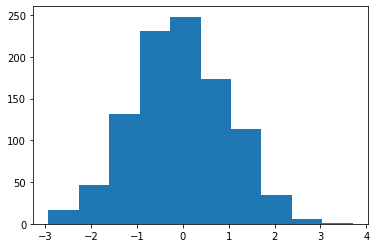

In [129]:
#params = dict(histtype='stepfilled',alpha=0.9,density=True,bins=10)
x = np.random.randn(1000)
plt.hist(x)